<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">K-Nearest Neighbor (KNN)</font></h1>
<hr>

# **Modelos de Predição** \*

Modelagem preditiva é o processo um modelo é criado para prever um resultado. A **Regressão** é um modelo de predição. Também podemos querer predizer uma categoria (como Fraude/Não Fraude, Spam/Não Spam ou Diagnóstico pouco/médio/muito Confiável). A predição de valores categóricos chamamos de **Classificação**.

Para a execução dessas tarefas podemos empregar diferentes **Modelos**.

> Tarefa: **Regressão**
>> Modelo: Linear, Polinomial, Exponencial etc.

> Tarefa: **Classificação**
>> Modelo: Knn, Árvore de Decisão, Regressão Logística, Redes Neurais etc.

## Aprendizado Supervisionado e Não Supervisionado

Os Modelos de Regressão e Classificação são em geral modelos de Aprendizado Supervisionado. Os modelos são criados a partir de um conjunto de dados exemplo, denominado **Conjunto de Treinamento**. Por exemplo, o modelo de Regressão Linear, emprega um conjunto de pontos previamente conhecido.

O Aprendizado Não Supervisionado, empregado por exemplo para Clusterização, não requer um conjunto de treinamento.

















## Modelo K-Nearest Neighbor (KNN)

O K-Vizinhos mais Próximos é um dos modelos mais simples, mas também bastante empregado, para classificação.
















<img src="https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/figuras/KNN.png" width=500, align="center"></a>










Basicamente esse modelo consiste na execução de 3 passos:

1. Calcular as distancias do elemento desejado para os demais
2. Encontrar os vizinhos mais próximos
3. Eleger a classe com mais 'votos' (mais representantes entre os vizinhos)

### Prós
* É simples de implementar.
* Treinar é mais fácil.
* Tem poucos parâmetros.

### Limitações
* Alto custo de previsão.
* Não funciona bem com vários recursos.
* Requer o uso de uma **função distância**

Esse último item tem uma série de implicações como a necessidade de **atributos numéricos** e, em muitos casos, a **normalização dos dados**.


## Funções Distância

Existem várias funções distância, mas em geral aplicaremos aqui a distância Euclidiana.

$$ d(x,y) = \sqrt{ (x_1 - y_1)^2 + (x_2 - y_2)^2 }$$ 







# CASE: **Aplicar um Empréstimos com Taxa Padrão ou Não?** \*

Empregaremos aqui, para podermos focar no entendimento do modelo, um exemplo bastante simples em que a classificação do **Tipo de Taxa de Empréstismo**, Padrão ou Não, são feitas a partir apenas de dois atributos, a **Idade** do Cliente e o **Valor do Empréstimo**.   


### **NOTA IMPORTANTE**: A construção dos dados e a solução *by scratch* aparecem aqui para você entender o modelo e você pode saltar os códigos que fazem essas construções e dar atenção apenas para os seus resultados. As seções mais  importantes e que você deve compreender **inclusive** os códigos aparecem com **'\*'**. 

In [ ]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  

Aqui construímos e exploramos nosso conjunto de dados.

Os dados históricos constituem o **conjunto de Treinamento** e com base nele queremos fazer a predição do tipo de Taxa de Empréstimo que deve ser aplicada para um novo caso, `case`.



In [ ]:
Loans = pd.DataFrame({'Age':[25,35,45,20,35,52,23,40,60,48,33],
                      'Loan':[40000,60000,80000,20000,120000,18000,95000,62000,100000,220000,150000],
                      'Type_loan':[1,1,1,1,1,1,0,0,0,0,0] }) # 1=normal 0=especial

case  = pd.DataFrame({'Age':[47],
                      'Loan':[142000]})

print(Loans)
print(case)

    Age    Loan  Type_loan
0    25   40000          1
1    35   60000          1
2    45   80000          1
3    20   20000          1
4    35  120000          1
5    52   18000          1
6    23   95000          0
7    40   62000          0
8    60  100000          0
9    48  220000          0
10   33  150000          0
   Age    Loan
0   47  142000


Graficamente:

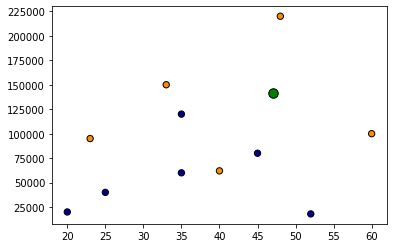

In [ ]:
# Não se preocupe com este código
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

from matplotlib.colors import ListedColormap
plt.scatter(Loans.Age, Loans.Loan, c=Loans.Type_loan, cmap=cmap_bold, edgecolor='k', s=40)
plt.scatter(case.Age, case.Loan, c='g', edgecolor='k', s=90)

plt.show()

## Resolução  *by scratch* (do zero) 

Podemos buscar resolver o problema diretamente aplicando a definição. Isto é, calculando a distância e verificando os vizinhos mais próximos.



In [ ]:
dist = []
for i in range(len(Loans)):
    d = float( np.sqrt( (Loans.iloc[i].Age - case.Age)**2 + (Loans.iloc[i].Loan - case.Loan)**2 ) )
    dist.append(d)
    
Loans['dist'] = dist    

print(Loans.sort_values('dist'))


    Age    Loan  Type_loan           dist
10   33  150000          0    8000.012250
4    35  120000          1   22000.003273
8    60  100000          0   42000.002012
6    23   95000          0   47000.006128
2    45   80000          1   62000.000032
9    48  220000          0   78000.000006
7    40   62000          0   80000.000306
1    35   60000          1   82000.000878
0    25   40000          1  102000.002373
3    20   20000          1  122000.002988
5    52   18000          1  124000.000101


## Predição de novos casos

> Qual seria nesse caso a classificação do nosso `case = ( Age =47, Loan = 148.000,00)` ?

Para um k=3 teríamos `Type_loan = 0`.

## Scikit-learn \*

Mas nem sempre os modelos são tão simples de implementar do zero e, felizmente, existem bibliotecas que implementam essas tarefas. Vamos ver como esse modelo pode ser construído com a biblioteca https://scikit-learn.org/

In [ ]:
# imports
from sklearn import neighbors

In [ ]:
# Preparando os dados
X = Loans[['Age','Loan']]      # X = entrada, variáveis independentes
y = Loans.Type_loan            # y = saída, variável dependente 

# Definindo ou declarando o modelo 
n_neighbors = 3
clf = neighbors.KNeighborsClassifier(n_neighbors)

# Aprendizado (construindo ou executando o modelo)
clf.fit(X, y)                  # Emprega o conjunto de treinamento 

# Fazendo a predição
Loan_type_pred = clf.predict(case)
print('Classificação Knn, k= ', n_neighbors, ' para o empréstimo ', case , ' é ', Loan_type_pred )

Classificação Knn, k=  3  para o empréstimo     Age    Loan
0   47  142000  é  [0]


Conseguimos o mesmo resultado anterior? **Sim**! ;-) 

## Normalizando os dados \*

Vamos agora fazer uma pequena modificação nos dados. Vamos normalizar os valores (por que?).






### Recriando os dados -

In [ ]:
Loans = pd.DataFrame({'Age':[25,35,45,20,35,52,23,40,60,48,33],
                      'Loan':[40000,60000,80000,20000,120000,18000,95000,62000,100000,220000,150000],
                      'Type_loan':[1,1,1,1,1,1,0,0,0,0,0] }) # 1=normal 0=especial

case  = pd.DataFrame({'Age':[47],
                      'Loan':[142000]})

         Age      Loan  Type_loan      dist
4   0.583333  0.545455          1  0.223607
10  0.550000  0.681818          0  0.236150
2   0.750000  0.363636          1  0.283783
8   1.000000  0.454545          0  0.288775
9   0.800000  1.000000          0  0.354937
7   0.666667  0.281818          0  0.381893
1   0.583333  0.272727          1  0.422996
6   0.383333  0.431818          0  0.453476
5   0.866667  0.081818          1  0.569763
0   0.416667  0.181818          1  0.591103
3   0.333333  0.090909          1  0.714157
        Age      Loan
0  0.783333  0.645455


### Normalizando os dados \*

In [ ]:
mAge = Loans.Age.max()
mLoan =  Loans.Loan.max()

case.Age = case.Age / mAge
case.Loan = case.Loan / mLoan

Loans.Age = Loans.Age / mAge
Loans.Loan = Loans.Loan / mLoan



### Calculando as Distância *by scratch* -

In [ ]:
dist = []
for i in range(len(Loans)):
    d = float( np.sqrt( (Loans.iloc[i].Age - case.Age)**2 + (Loans.iloc[i].Loan - case.Loan)**2 ) )
    dist.append(d)
    
Loans['dist'] = dist    

print(Loans.sort_values('dist'))
print(case)

### Agora com o `Sci-kit learn` com os dados normalizados \*

Qual a conclusão do modelo agora? Vamos repetir, com o uso do `Sci-kit learn`. 

In [ ]:
# Preparando os dados
X = Loans[['Age','Loan']]      # X = entrada, variáveis independentes
y = Loans.Type_loan            # y = saída, variável dependente 

# Definindo ou declarando o modelo 
n_neighbors = 3
clf = neighbors.KNeighborsClassifier(n_neighbors)

# Aprendizado (construindo ou executando o modelo)
clf.fit(X, y)                  # Emprega o conjunto de treinamento 

# Fazendo a predição
Loan_type_pred = clf.predict(case)
print('Classificação Normalizado Knn, k= ', n_neighbors, ' para o empréstimo ', case , ' é ', Loan_type_pred )

Classificação Normalizado Knn, k=  3  para o empréstimo          Age      Loan
0  0.783333  0.645455  é  [1]


## Adicionando um atributo categórico

Embora o Knn não possa empregar atributos categóricos diretamente, podemos transformar atributos categóricos em numéricos com *hot encode* e então aplicar o modelo sobre esses valores.










In [ ]:
Loans = pd.DataFrame({'Age':[25,35,45,20,35,52,23,40,60,48,33],
                      'Loan':[40000,60000,80000,20000,120000,18000,95000,62000,100000,220000,150000],

                      'Duration':['Short','Long','Short','Undefined','Long','Short','Long','Short','Undefined','Long', 'Short'],

                      'Type_loan':[1,1,1,1,1,1,0,0,0,0,0] }) # 1=normal 0=especial

case  = pd.DataFrame({'Age':[47],
                      'Duration':['Short'],
                      'Loan':[142000]})

print(Loans)
print(case)


    Age    Loan   Duration  Type_loan
0    25   40000      Short          1
1    35   60000       Long          1
2    45   80000      Short          1
3    20   20000  Undefined          1
4    35  120000       Long          1
5    52   18000      Short          1
6    23   95000       Long          0
7    40   62000      Short          0
8    60  100000  Undefined          0
9    48  220000       Long          0
10   33  150000      Short          0
   Age Duration    Loan
0   47    Short  142000


### Preparando os dados: Hot encode e Normalização \*

A normalização segue do mesmo modo que fizemos anteriormente.

### Normalizando os dados \*

O mesmo que fizemos anteriormente.



In [ ]:
# Normalização 

mAge = Loans.Age.max()
mLoan =  Loans.Loan.max()

case.Age = case.Age / mAge
case.Loan = case.Loan / mLoan

Loans.Age = Loans.Age / mAge
Loans.Loan = Loans.Loan / mLoan


print(Loans)
print(case)

         Age      Loan   Duration  Type_loan
0   0.416667  0.181818      Short          1
1   0.583333  0.272727       Long          1
2   0.750000  0.363636      Short          1
3   0.333333  0.090909  Undefined          1
4   0.583333  0.545455       Long          1
5   0.866667  0.081818      Short          1
6   0.383333  0.431818       Long          0
7   0.666667  0.281818      Short          0
8   1.000000  0.454545  Undefined          0
9   0.800000  1.000000       Long          0
10  0.550000  0.681818      Short          0
        Age Duration      Loan
0  0.783333    Short  0.645455


### Hot Encode \*

O **Hot Encode** (ou **Dummy Encode**) é uma transformação importante e a melhor forma de empregar a transaformação de dados categóricos para dados numéricos. Ela é preferível a empregar o **Label Encode** (isto é, associar valores ordinais como 0,1,2,3... para cada categoria).




In [ ]:
# Hot encode
pd.set_option('display.max_columns', None)

dummies = pd.get_dummies(Loans.Duration,prefix='Duration')
Loans = pd.concat([Loans, dummies],axis=1)
print(Loans)

dummies = pd.get_dummies(case.Duration,prefix='Duration')
case = pd.concat([case, dummies],axis=1)
print(case)




         Age      Loan   Duration  Type_loan  Duration_Long  Duration_Short  \
0   0.416667  0.181818      Short          1              0               1   
1   0.583333  0.272727       Long          1              1               0   
2   0.750000  0.363636      Short          1              0               1   
3   0.333333  0.090909  Undefined          1              0               0   
4   0.583333  0.545455       Long          1              1               0   
5   0.866667  0.081818      Short          1              0               1   
6   0.383333  0.431818       Long          0              1               0   
7   0.666667  0.281818      Short          0              0               1   
8   1.000000  0.454545  Undefined          0              0               0   
9   0.800000  1.000000       Long          0              1               0   
10  0.550000  0.681818      Short          0              0               1   

    Duration_Undefined  
0                    0  
1

## Mesma estrutura, Treinamento e Teste *

Tando a normalização, como o **hot encode** precisam ser aplicados tanto no conjunto de treinamento como nas novas instâncias ou conjunto de dados de teste (o conjunto que contêm as instâncias que desejamos prever). Isto é:

> **Transformações(*X Treinamento*) = Transformações(*X Teste*)**

E **Treinamento e Teste** têm as mesmas dimensões e escalas.

Como em uma função, os modelos em `scikit-learn` (e de muitos outros pacotes) requer que os conjuntos de treinamento e teste tenham a mesma estrutura. Eles funcionam como uma função matemática bem estruturada. Se você tem uma função (modelo):

$$ f(x,y,z) =  x * y + z $$

definida com 3 variáveis, você só pode avaliar informando as 3 variáveis:

$$ f(1,2,3) =  1 * 2 + 3 = 5 $$

Mas não pode avaliar a função deste modo:

$$ f(1,2) =  1 * 2 + ?? $$

Os modelos em `Python` funcionam do mesmo modo. Assim, os mesmos atributos X do conjunto de treinamento (`Loan`) empregados para definir o modelo, precisam aparecer no também no conjunto de teste (`case`). [1] 

[1] Nota: X, são os atributos de entrada, como $x,y,z$ da função acima. O y, ou o atributo classe, ou ainda classe preditora, não precisa constar do conjunto de teste.


### Ajustando a estrutura dos dados de Teste \*

In [ ]:
print(Loans.columns)

# Estes serão os atributos, a estrutura de entrada do nosso modelo, como na definição da nossa função f(x,y,z)
X = Loans[['Age','Loan','Duration_Short', 'Duration_Long', 'Duration_Undefined']]      # X = entrada, variáveis independentes
print(X.columns)
print(case.columns)

Index(['Age', 'Loan', 'Duration', 'Type_loan', 'Duration_Long',
       'Duration_Short', 'Duration_Undefined'],
      dtype='object')
Index(['Age', 'Loan', 'Duration_Short', 'Duration_Long', 'Duration_Undefined'], dtype='object')
Index(['Age', 'Duration', 'Loan', 'Duration_Short'], dtype='object')


Precisamos então adequar nosso `case` a entrada desse modelo:

In [ ]:
case['Duration_Long'] = 0
case['Duration_Undefined'] = 0
case = case.drop(columns=['Duration'])

print(case)

print(case.columns)


        Age      Loan  Duration_Short  Duration_Long  Duration_Undefined
0  0.783333  0.645455               1              0                   0
Index(['Age', 'Loan', 'Duration_Short', 'Duration_Long', 'Duration_Undefined'], dtype='object')


## Treinando e Aplicando o modelo \*

Agora estamos prontos para aplicar o modelo knn. Note: **É o mesmo código empregado até agora**, a mesma estrutura de programa, apenas alterando as variáveis de entrada.

In [ ]:
# Preparando os dados
X = Loans[['Age','Loan','Duration_Short', 'Duration_Long', 'Duration_Undefined']]      # X = entrada, variáveis independentes
y = Loans.Type_loan            # y = saída, variável dependente 

# Definindo ou declarando o modelo 
n_neighbors = 3
clf = neighbors.KNeighborsClassifier(n_neighbors)

# Aprendizado (construindo ou executando o modelo)
clf.fit(X, y)                  # Emprega o conjunto de treinamento 

# Fazendo a predição
Loan_type_pred = clf.predict(case)
print('Classificação Normalizado Knn, k= ', n_neighbors, ' para o empréstimo ', case , ' é ', Loan_type_pred )

Classificação Normalizado Knn, k=  3  para o empréstimo          Age      Loan  Duration_Short  Duration_Long  Duration_Undefined
0  0.783333  0.645455               1              0                   0  é  [0]
